In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('karriere-at.csv')
df.head()

,Unnamed: 0,title,text,url
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",https://www.karriere.at/jobs/6431312
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,https://www.karriere.at/jobs/6199814
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,https://www.karriere.at/jobs/6490925
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,https://www.karriere.at/jobs/6472427
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,https://www.karriere.at/jobs/6506291


In [5]:
df["text"][0]

'Du hast gerade deine Ausbildung an der HTL, Uni oder FH abgeschlossen und siehst Dich nun nach der perfekten Einsteigerposition um? Du willst deine Fähigkeiten mit Java demonstrieren und gleichzeitig noch ausbauen und weiterentwickeln? Dann bist Du bei unserem Entwicklungsteam in Wien an der richtigen Adresse! Junior-Entwickler (m/w) Nach einem bis zu sechsmonatigen Schulungsprogramm wirst Du bei uns: Prototypen und "Proof of concept" für neue Projekte erstellen Im Rahmen eines agilen Projektteams arbeiten Enterprise Software weiterentwickeln Du hast eine abgeschlossene Informatik-Ausbildung (HTL, FH, Studium Informatik, o.ä.) und solide Grundlagen in: Java (J2SE) SQL HTML5, CSS, Javascript Diese Technologien werden Dir in unserem Schulungsprogramm nähergebracht: Angular, React, Bootstrap Spring Boot Eclipse, IntelliJ IDEA JSF, JPA, Hibernate, CDI, REST Maven, Gradle, GIT Unix/Linux Grundlagen Jira, Confluence Docker AWS Scrum Wir bieten Dir: Zahlreiche Workshops und Weiterbildungsmög

In [6]:
df=df.drop("url", axis='columns')

In [7]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText  

In [8]:
df['cleaned_re'] = df['text'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed: 0,title,text,cleaned_re
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung an der htl uni...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer d w m wien als ...
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,senior java entwickler m w d java entwickler m...
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,senior java developer m w to day is your day ...
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,wien festanstellung direktvermittlung jobnr un...


In [9]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [10]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed: 0,title,text,cleaned_re,cleaned_text
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung an der htl uni...,du hast gerade deine ausbildung der htl uni od...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer d w m wien als ...,senior java software developer w wien al inter...


In [11]:
df=df.drop("cleaned_re", axis='columns')
df

,Unnamed: 0,title,text,cleaned_text
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung der htl uni od...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer w wien al inter...
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,senior java entwickler w java entwickler w wie...
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,senior java developer w day day today expert o...
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,wien festanstellung direktvermittlung jobnr un...
...,...,...,...,...
862,862,Web Developer bei ADF International Austria ge...,Everyone says they want to change the world. W...,everyone say want change world looking people ...
863,863,Support Engineer (f/m/d) bei DIMOCO Payments G...,"DIMOCO, founded in 2000, is a regulated paymen...",dimoco founded regulated payment company hold ...
864,864,Lehre Applikationsentwicklung - Coding bei eur...,STARTE DEINE KARRIERE! LEHRE APPLIKATIONSENTWI...,starte deine karriere lehre applikationsentwic...
865,865,Senior Big Data Engineer (m/w/d) bei STIWA Gro...,"Die STIWA Group, mit rund 2.300 MitarbeiterInn...",die stiwa group mit rund mitarbeiterinnen ist ...


In [11]:
from google.colab import drive
drive.mount('drive')

ModuleNotFoundError: No module named 'google'

In [12]:
df.to_csv('Cleaned_karriere-at.csv', encoding='utf-8', index=False)

In [15]:
cell_text = print(df["cleaned_text"].values[3])
print(cell_text)

senior java developer w day day today expert ober sterreich gmbh ist ein sterreichisches projektberatungsunternehmen da sich auf expertinnen im bereich spezialisiert hat wir suchen laufend hochqualifizierte und erfahrene fachkr fte zur erweiterung unseres expertinnen team linz und wels suchen wir ab sofort jeweils einen senior java developer w aufgaben mitarbeit bei der abwechslungsreichen entwicklung von java web applikationen al teil eines scrum team je nach pr ferenz al fullstack frontend oder backend entwickler implementierung von neuentwicklungen dokumentation und mitarbeit bei der qualit tssicherung anforderungen abgeschlossene ausbildung im bereich softwareentwicklung htl fh uni und mehrj hrige einschl gige berufserfahrung fundierte java kenntnisse zumindest gute kenntnisse im bereich g ngiger datenbanken lernbereitschaft teamf higkeit und selbstst ndige arbeitsweise benefit arbeitsplatz ist ffentlich sehr gut erreichbar kantine flexible arbeitszeiten fundierte strukturierte ein

In [16]:
df.shape

(867, 4)

In [17]:
#getting the entire resume text
corpus=" "
for i in range(0,867):
    corpus= corpus+ df["cleaned_text"][i]

In [18]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
new_text = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

Old length:  2447795
New length:  1493812


In [19]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(new_text)
#tokens = tokenizer.tokenize(corpus)
len(new_text)


1493812

In [20]:
new_text

'gerade abgeschlossen siehst perfekten einsteigerposition willst higkeiten java demonstrieren gleichzeitig ausbauen weiterentwickeln entwicklungsteam richtigen adresse junior entwickler sechsmonatigen schulungsprogramm prototypen proof concept projekte erstellen rahmen agilen projektteams enterprise software weiterentwickeln informatik informatik solide grundlagen java jse sql html cs javascript schulungsprogramm n hergebracht angular react bootstrap spring boot eclipse intellij idea jsf jpa hibernate cdi rest maven gradle git unix linux grundlagen jira confluence docker aws scrum workshop ca jahr eigenes budget hardware gesellige dienstleistungs wollzeile og wiensenior java software developer internationale familienunternehmen diversit wichtig gilt ganze summe teile tr erfolg unabh geschlecht herkunft kultur hautfarbe grund bewerbungen angabe informationen geschickt ebcont ebcont hrender sterreichischer dienstleister branchen einschlie lich ffentlichen sektors digitalisierung ftskriti

In [21]:
from nltk.tokenize import word_tokenize
tokenized_sents = word_tokenize(new_text)


In [22]:
tokenized_sents

['gerade',
 'abgeschlossen',
 'siehst',
 'perfekten',
 'einsteigerposition',
 'willst',
 'higkeiten',
 'java',
 'demonstrieren',
 'gleichzeitig',
 'ausbauen',
 'weiterentwickeln',
 'entwicklungsteam',
 'richtigen',
 'adresse',
 'junior',
 'entwickler',
 'sechsmonatigen',
 'schulungsprogramm',
 'prototypen',
 'proof',
 'concept',
 'projekte',
 'erstellen',
 'rahmen',
 'agilen',
 'projektteams',
 'enterprise',
 'software',
 'weiterentwickeln',
 'informatik',
 'informatik',
 'solide',
 'grundlagen',
 'java',
 'jse',
 'sql',
 'html',
 'cs',
 'javascript',
 'schulungsprogramm',
 'n',
 'hergebracht',
 'angular',
 'react',
 'bootstrap',
 'spring',
 'boot',
 'eclipse',
 'intellij',
 'idea',
 'jsf',
 'jpa',
 'hibernate',
 'cdi',
 'rest',
 'maven',
 'gradle',
 'git',
 'unix',
 'linux',
 'grundlagen',
 'jira',
 'confluence',
 'docker',
 'aws',
 'scrum',
 'workshop',
 'ca',
 'jahr',
 'eigenes',
 'budget',
 'hardware',
 'gesellige',
 'dienstleistungs',
 'wollzeile',
 'og',
 'wiensenior',
 'java',
 

In [23]:
flattened = []
for sublist in tokenized_sents:
    for val in sublist:
        flattened.append(val)
print(flattened)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon 

[('team', 1994),
 ('software', 1416),
 ('java', 1078),
 ('entwicklung', 961),
 ('berufserfahrung', 654),
 ('development', 603),
 ('developer', 547),
 ('javascript', 440),
 ('sql', 360),
 ('cloud', 359),
 ('management', 358),
 ('softwareentwicklung', 346),
 ('framework', 334),
 ('agilen', 331),
 ('engineer', 331),
 ('umfeld', 330),
 ('application', 313),
 ('tool', 311),
 ('angular', 309),
 ('deutsch', 290),
 ('product', 289),
 ('support', 287),
 ('informatik', 283),
 ('projekte', 281),
 ('frontend', 281),
 ('data', 278),
 ('n', 272),
 ('code', 251),
 ('html', 246),
 ('entwickler', 238),
 ('spring', 229),
 ('senior', 225),
 ('digital', 222),
 ('backend', 219),
 ('cs', 217),
 ('entwickeln', 206),
 ('scrum', 197),
 ('agile', 197),
 ('projekten', 192),
 ('typescript', 185),
 ('technical', 183),
 ('innovative', 182),
 ('devops', 179),
 ('react', 171),
 ('security', 170),
 ('technischen', 167),
 ('git', 158),
 ('kubernetes', 157),
 ('professional', 154),
 ('produkte', 151),
 ('python', 151),


In [43]:
df_1 = pd.DataFrame (mostcommon, columns = ['skills','no.of.count'])
print (df_1)

              skills  no.of.count
0               team         1994
1           software         1416
2               java         1078
3        entwicklung          961
4    berufserfahrung          654
..               ...          ...
995          startup           36
996           domain           36
997          ideally           36
998        implement           36
999            proud           36

[1000 rows x 2 columns]


In [48]:
df_1

,skills
0,team
1,software
2,java
3,entwicklung
4,berufserfahrung
...,...
995,startup
996,domain
997,ideally
998,implement


In [50]:
most_common=df_1.values.tolist()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [52]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(new_text)

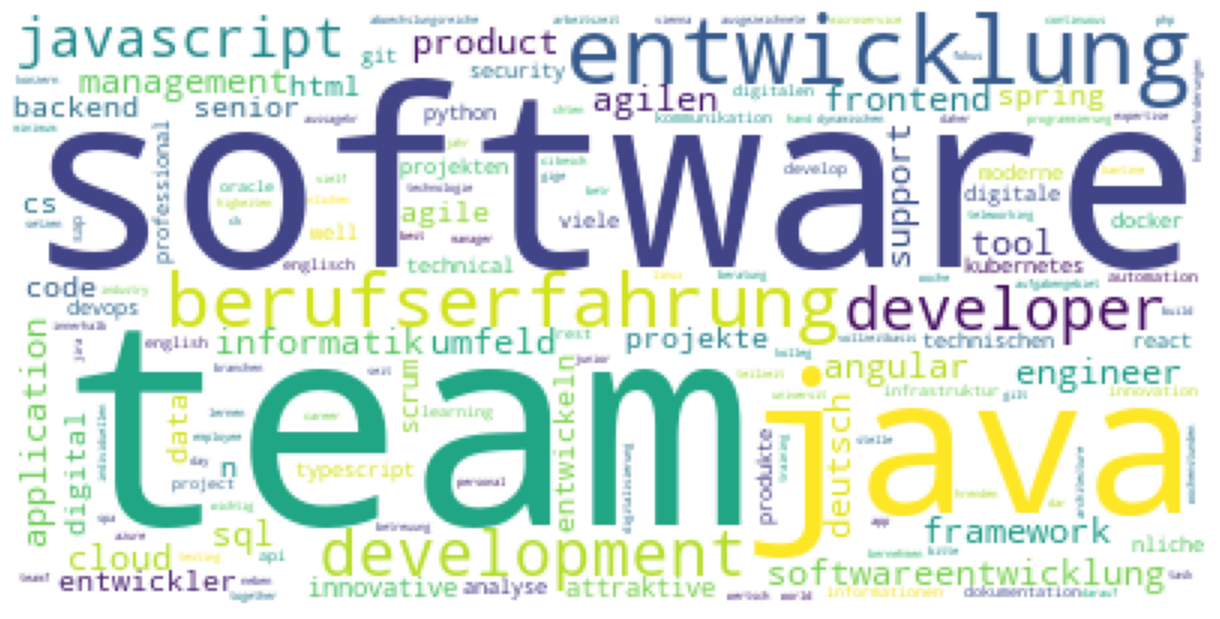

In [27]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [53]:
from nltk.util import ngrams

In [64]:
list(ngrams(most_common,2))

[(['team'], ['software']),
 (['software'], ['java']),
 (['java'], ['entwicklung']),
 (['entwicklung'], ['berufserfahrung']),
 (['berufserfahrung'], ['development']),
 (['development'], ['developer']),
 (['developer'], ['javascript']),
 (['javascript'], ['sql']),
 (['sql'], ['cloud']),
 (['cloud'], ['management']),
 (['management'], ['softwareentwicklung']),
 (['softwareentwicklung'], ['framework']),
 (['framework'], ['agilen']),
 (['agilen'], ['engineer']),
 (['engineer'], ['umfeld']),
 (['umfeld'], ['application']),
 (['application'], ['tool']),
 (['tool'], ['angular']),
 (['angular'], ['deutsch']),
 (['deutsch'], ['product']),
 (['product'], ['support']),
 (['support'], ['informatik']),
 (['informatik'], ['projekte']),
 (['projekte'], ['frontend']),
 (['frontend'], ['data']),
 (['data'], ['n']),
 (['n'], ['code']),
 (['code'], ['html']),
 (['html'], ['entwickler']),
 (['entwickler'], ['spring']),
 (['spring'], ['senior']),
 (['senior'], ['digital']),
 (['digital'], ['backend']),
 (['

In [59]:
trigram= list(ngrams(most_common,3))

In [60]:
trigram

[(['team'], ['software'], ['java']),
 (['software'], ['java'], ['entwicklung']),
 (['java'], ['entwicklung'], ['berufserfahrung']),
 (['entwicklung'], ['berufserfahrung'], ['development']),
 (['berufserfahrung'], ['development'], ['developer']),
 (['development'], ['developer'], ['javascript']),
 (['developer'], ['javascript'], ['sql']),
 (['javascript'], ['sql'], ['cloud']),
 (['sql'], ['cloud'], ['management']),
 (['cloud'], ['management'], ['softwareentwicklung']),
 (['management'], ['softwareentwicklung'], ['framework']),
 (['softwareentwicklung'], ['framework'], ['agilen']),
 (['framework'], ['agilen'], ['engineer']),
 (['agilen'], ['engineer'], ['umfeld']),
 (['engineer'], ['umfeld'], ['application']),
 (['umfeld'], ['application'], ['tool']),
 (['application'], ['tool'], ['angular']),
 (['tool'], ['angular'], ['deutsch']),
 (['angular'], ['deutsch'], ['product']),
 (['deutsch'], ['product'], ['support']),
 (['product'], ['support'], ['informatik']),
 (['support'], ['informatik']

In [62]:
skills = pd.DataFrame (trigram, columns = ['Skill_1','Skill_2','skill_3'])
skills

,Skill_1,Skill_2,skill_3
0,[team],[software],[java]
1,[software],[java],[entwicklung]
2,[java],[entwicklung],[berufserfahrung]
3,[entwicklung],[berufserfahrung],[development]
4,[berufserfahrung],[development],[developer]
...,...,...,...
993,[gegeben],[hohem],[startup]
994,[hohem],[startup],[domain]
995,[startup],[domain],[ideally]
996,[domain],[ideally],[implement]


In [66]:
skills.to_csv('skills.csv')

In [31]:
import spacy
  
nlp = spacy.load('de_core_news_sm')

In [32]:
nlp.max_length = len(new_text)
doc = nlp(new_text, disable = ['ner', 'parser'])
spacy.displacy.render(doc, style='ent',jupyter=True)

In [58]:
doc = nlp(new_text)
for word in doc.ents:
   
    print(word.text,word.label_) 


java MISC
junior entwickler PER
java MISC
boot eclipse PER
intellij idea PER
linux MISC
java MISC
diversit ORG
devops MISC
millennium tower meidling senior LOC
tower meidling hard LOC
attraktives PER
java MISC
continuous jira bamboo jenkins confluence git scrum PER
jobangebote PER
kununu PER
kununu PER
talentgespr chen ORG
learn MISC
teilzeitvertr ge PER
kolleg weiterentwickeln PER
aussagekr LOC
java MISC
java MISC
java MISC
chtest PER
gef MISC
gleichg LOC
daf zust MISC
java MISC
jenkins webservices PER
teamevents senior java MISC
kenntnissen PER
erfahrungslevel LOC
chtest LOC
word LOC
fellberg PER
freue computer MISC
fte ORG
freiberufler LOC
bewerbungsprozesses kompetent PER
futurescomputerfutures comsenior java developer MISC
sterreichisches PER
wels LOC
java MISC
java MISC
java MISC
teamf LOC
unternehmens LOC
foto PER
pdf ooe today jasmin gibus PER
mitarbeiterorientierten wertsch PER
java MISC
java MISC
java MISC
versicherungsbranche MISC
java MISC
java MISC
mitarbeiterorientierten 